## P1 Parallel CNNs and RNNs



**P1.1**
The goal is to train a CNN based classifier on the Mel spectrograms to predict the corresponding music genres.


In [17]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, concatenate, Dense, LeakyReLU, Dropout
from tensorflow.keras.models import Model

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
train_dataset = tf.data.Dataset.load('/content/drive/MyDrive/assign2_train')
val_dataset = tf.data.Dataset.load('/content/drive/MyDrive/assign2_val')

In [48]:
# pre-batch the data
batch_size = 128
train_dataset_batch = train_dataset.batch(batch_size)
val_dataset_batch = val_dataset.batch(batch_size)

for x_batch, y_batch in train_dataset_batch.take(1): # checking
    print(x_batch.shape)

(128, 80, 80, 1)


In [49]:
for x, y in tf.data.Dataset.load('/content/drive/MyDrive/assign2_train').take(1):
    print(x.shape)
    print(y.shape)
    print(y)

(80, 80, 1)
(8,)
tf.Tensor([1. 0. 0. 0. 0. 0. 0. 0.], shape=(8,), dtype=float32)


This shows that we are working with one-hot encoded labels. This means that the true label (0 - 7) is represented by a vector with the 1 position corresponding to it's class. Because of this, we will use `categorical_crossentropy` as the loss function when we train the model.

I will use `softmax` as the activation function because the task is a multi-class classification problem with eight possible music genres. `softmax` converts the output of the network into a probability distribution across these classes, allowing the model to predict the most likely genre for each input.

In [50]:
input_layer = Input(shape=(80, 80, 1))

# first parallel branch:
branch1 = Conv2D(3, (8, 8), padding='same')(input_layer)
branch1 = LeakyReLU(negative_slope=0.3)(branch1)
branch1 = MaxPooling2D(pool_size=(4, 4))(branch1)
branch1 = Flatten()(branch1) # flattens the output

# second parallel branch:
branch2 = Conv2D(4, (4, 4), padding='same')(input_layer)
branch2 = LeakyReLU(negative_slope=0.3)(branch2)
branch2 = MaxPooling2D(pool_size=(2, 2))(branch2)
branch2 = Flatten()(branch2) # flattens the output

# merge branches:
merged = concatenate([branch1, branch2])

# output layer:
output = Dense(8, activation='softmax')(merged) # softmax activation

model = Model(inputs=input_layer, outputs=output)

In [51]:
# compile the model:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy']) # using stochastic gradient descent

As mentioned previously, I am using `categorical_crossentropy` as the loss funtion because we are working with one-hot labels. I used a `learning rate = 0.01` because it's a common starting point for shallow CNNs trained with SGD.

In [52]:
# train the model on the batched datasets:
history = model.fit(train_dataset_batch, validation_data=val_dataset_batch, epochs=50)

Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.3759 - loss: 1.6700 - val_accuracy: 0.5188 - val_loss: 1.2507
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5740 - loss: 1.1413 - val_accuracy: 0.5671 - val_loss: 1.1120
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6322 - loss: 0.9913 - val_accuracy: 0.6033 - val_loss: 1.0305
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.6677 - loss: 0.8935 - val_accuracy: 0.6400 - val_loss: 0.9739
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6996 - loss: 0.8219 - val_accuracy: 0.6608 - val_loss: 0.9334
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7216 - loss: 0.7660 - val_accuracy: 0.6704 - val_loss: 0.9022
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7440 - loss: 0.7201 - val_accuracy: 0.6846 - val_loss: 0.8778
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7630 - loss: 0.6809 - val_accuracy: 0.6900 - v

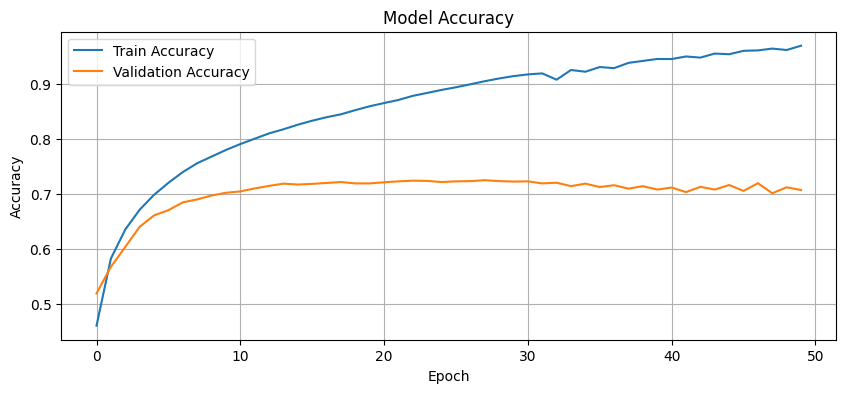

In [53]:
# accuracy plot
plt.figure(figsize=(10, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


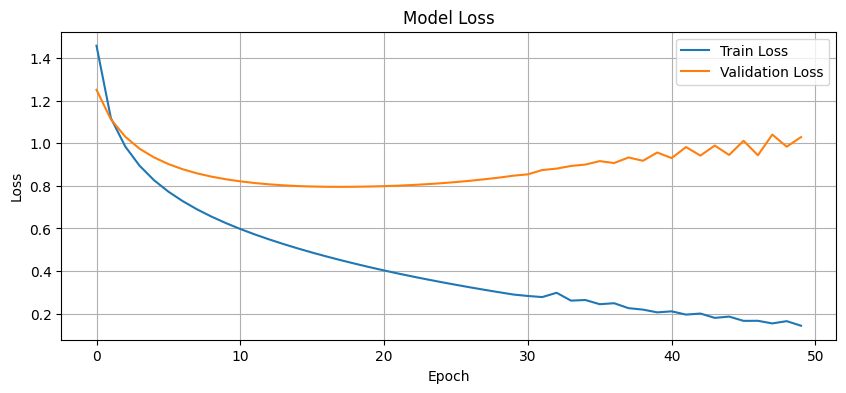

In [54]:
# loss plot
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [55]:
final_val_acc = history.history['val_accuracy'][-1]
print(f"Final Validation Accuracy: {final_val_acc:.2%}")

Final Validation Accuracy: 70.71%


After training the parallel CNN model for 50 epochs, the final validation accuracy reached 70.71%. I experimented with different learning rates, and the highest accuracy I got was with `learning_rate = 0.01`. This shows that the CNN was effective at learning relevant features from the Mel spectrograms for music genre classification.

I used a predefined training and validation split provided in the dataset. The model was trained on the training set and evaluated on a separate validation set to ensure that no training data was used during validation.

**P1.2**
The goal is to train a CNN-RNN based classifier on the Mel spectrograms to predict the corresponding music genres

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout

In [ ]:
# reduce the imput dimensionality
def reduce_dimension(x, y):
    return tf.squeeze(x, axis=-1), y

train_dataset_squeeze = train_dataset.map(reduce_dimension)
val_dataset_squeeze = val_dataset.map(reduce_dimension)

In [ ]:
# batch the datasets
batch_size = 128
train_dataset_seq = train_dataset_squeeze.batch(batch_size)
val_dataset_seq = val_dataset_squeeze.batch(batch_size)

After applying `reduce_dimension`, the input shape changed from `(80, 80, 1)` to `(80, 80)`. This turned the spectrogram into a sequence, which works better for RNNs. Because of this, we will use `Conv1D` instead of `Conv2D` to work with the sequential format.

I will also use `softmax` in this part for the same reason as in P1.1 - `softmax` turns the output into class probabilities so it can predict one of 8 genres and gave us a good accuracy in P1.1

In [ ]:
# Model
input_layer = Input(shape=(80, 80))

# CNN layers
x = Conv1D(8, kernel_size=4, activation='relu', padding='same')(input_layer)
x = MaxPooling1D(pool_size=2)(x)

x = Conv1D(6, kernel_size=3, activation='relu', padding='same')(x)
x = MaxPooling1D(pool_size=2)(x)

# RNN layers
x = LSTM(128, return_sequences=True)(x)
x = LSTM(32, return_sequences=False)(x)

# Fully connected dense layer
x = Dense(200, activation='relu')(x)
x = Dropout(0.2)(x)

# Output layer
output = Dense(8, activation='softmax')(x)

model = Model(inputs=input_layer, outputs=output)

In [ ]:
# compile the model:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#train the model:
history = model.fit(train_dataset_seq, validation_data=val_dataset_seq, epochs=50)

Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 12s 112ms/step - accuracy: 0.1674 - loss: 2.0576 - val_accuracy: 0.2488 - val_loss: 2.0237
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.2440 - loss: 2.0083 - val_accuracy: 0.2633 - val_loss: 1.9709
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 126ms/step - accuracy: 0.2532 - loss: 1.9502 - val_accuracy: 0.2800 - val_loss: 1.9219
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 110ms/step - accuracy: 0.2591 - loss: 1.8995 - val_accuracy: 0.2612 - val_loss: 1.8864
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 124ms/step - accuracy: 0.2752 - loss: 1.8651 - val_accuracy: 0.2621 - val_loss: 1.8602
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 126ms/step - accuracy: 0.2806 - loss: 1.8367 - val_accuracy: 0.2750 - val_loss: 1.8386
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 109ms/step - accuracy: 0.2994 - loss: 1.8182 - val_accuracy: 0.2879 - val_loss: 1.8195
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 136ms/step - accuracy: 0.3117 - loss: 1.8011 - val_accuracy

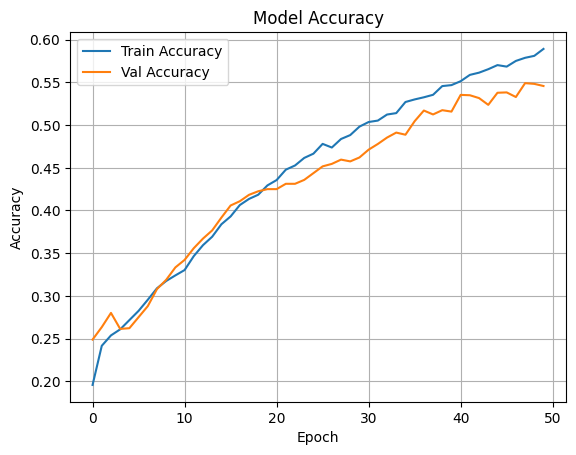

In [ ]:
# accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.grid(True)
plt.show()

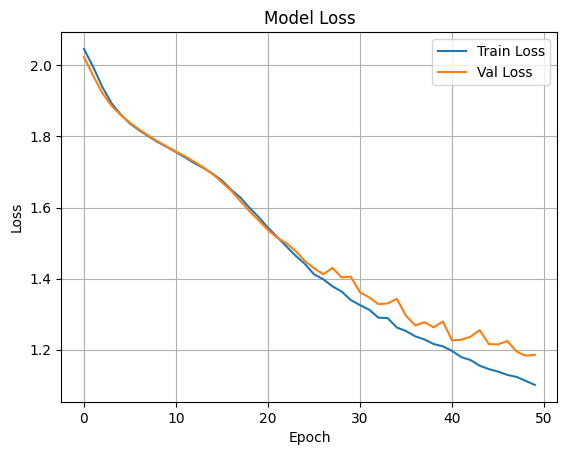

In [ ]:
# loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]*100:.2f}%")


Final Validation Accuracy: 54.58%


After training the CNN-RNN model for 50 epochs, I achieved a final validation accuracy of 54.58%, successfully exceeding the 50% requirement. This shows that the model was able to learn meaningful patterns from the spectrogram sequences to classify music genres. I used a predefined training and validation split provided in the dataset. The model was trained on the training set and evaluated on a separate validation set to ensure that no training data was used during validation.